<a href="https://colab.research.google.com/github/Suhas-S63/Advanced_ML_Lab/blob/main/2348563_AML_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('/content/drive/MyDrive/Program_2_Dataset.csv')
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [12]:
data.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


data is clean and there are no missing values

In [13]:
data.columns

Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms ', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')

In [14]:
predictor_attributes = ['Avg_rooms ','Distance','Property_TaxRate','Non_Retail_Acres']
target_attribute = ['MValue']

X = data[predictor_attributes]
Y = data[target_attribute]

As mentioned in the statement problem we are considering the attributes Av_room, distance, Property_TaxRate, Non_Retail_Acres as predictors
and MValue as the target variable.

The predictor attributes all helps in the prediction of Median Value of the homes rather than a single attribute in the previous exercise

A function to calculate the Variance Inflation Factor (VIF) for all the predictor attributes is defined which helps us to understand which attributes are best ones and also the ones which gives us the more information than other attributes.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF_Calculator(x):
  data_vif = pd.DataFrame()  #Initialising a dataframe object to store the results of VIF
  data_vif['Predictors'] = x.columns
  data_vif['VIF_values'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
  return data_vif


results_vif = VIF_Calculator(x)
print(results_vif)

         Predictors  VIF_values
0        Avg_rooms    16.747965
1          Distance    6.880607
2  Property_TaxRate   13.861510
3  Non_Retail_Acres    9.598374


From observing and interpreting the results of the VIF for the predictors we see that the attributes 'Avg_rooms' and 'Property_TaxRate' are highly multi correalted(multicolllinearity) hence which makes the model not much accurate while predicting the Mean Value for the homes (Overfitting the model).

This means that its safe to drop those attributes when building the model

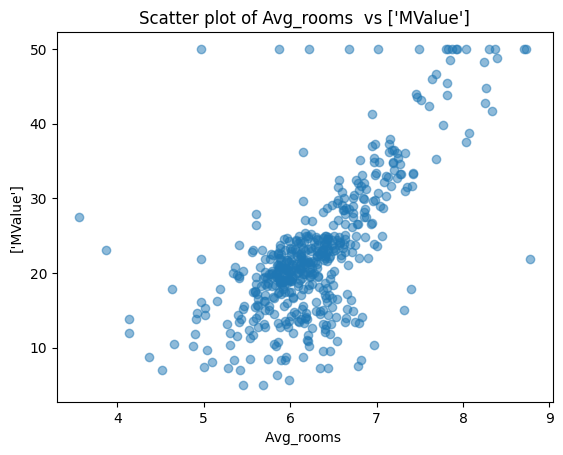

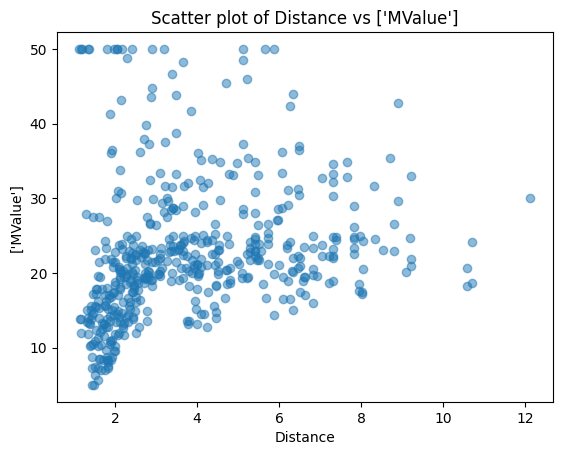

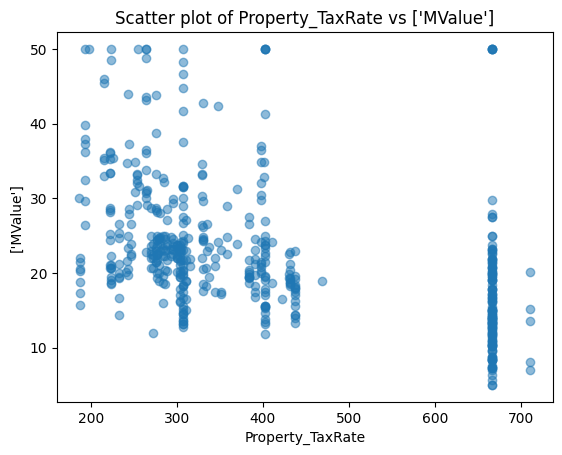

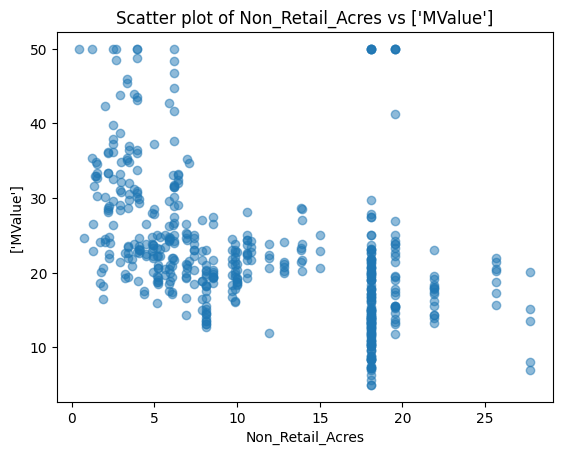

In [16]:
# 3. Visualize association with target using scatter plot
for predictor in predictor_attributes:
    plt.scatter(data[predictor], data[target_attribute], alpha=0.5)
    plt.title(f'Scatter plot of {predictor} vs {target_attribute}')
    plt.xlabel(predictor)
    plt.ylabel(target_attribute)
    plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 4. Split data into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.33, random_state=42)


# 5. Build multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [18]:
# Printing the coefficient and intercept values for the model

coefficient = model.coef_
intercepts = model.intercept_

print(f'Coefficient: {coefficient}, Intercept: {intercepts}')

Coefficient: [[ 7.71823295 -0.65291673 -0.01373718 -0.21258162]], Intercept: [-15.33221081]


In [19]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
# Train dataset
y_training_predictions = model.predict(X_train)
training_mse = mean_squared_error(Y_train, y_training_predictions)
training_r2_score = r2_score(Y_train, y_training_predictions)
adjusted_training_r2_score = 1 - (1 - training_r2_score) * (len(Y_train) - 1) / (len(Y_train) - X_train.shape[1] - 1)

# Test dataset
y_testing_predictions = model.predict(X_test)
testing_mse = mean_squared_error(Y_test, y_testing_predictions)
testing_r2_score = r2_score(Y_test, y_testing_predictions)
adjusted_testing_r2_score = 1 - (1 - testing_r2_score) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)

In [20]:
# Metrics Result for Trainging Data
print("Mean Squared Error (Train):", training_mse)
print("R-squared (Train):", training_r2_score)
print("Adjusted R-squared (Train):", adjusted_training_r2_score)

Mean Squared Error (Train): 40.83615624350907
R-squared (Train): 0.552374742371587
Adjusted R-squared (Train): 0.547013960843103


In [21]:
# Metrics Result for Testing Data
print("Mean Squared Error (Test):", testing_mse)
print("R-squared (Test):", testing_r2_score)
print("Adjusted R-squared (Test):", adjusted_testing_r2_score)

Mean Squared Error (Test): 27.569771797553905
R-squared (Test): 0.60781481718806
Adjusted R-squared (Test): 0.5981312324272714
